In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
df = pd.read_csv('Boston.csv')
df = df.drop(columns='Date')
df = df.drop(columns='Type')
df = df.drop(columns='Opponent')
df = df.drop(columns='BruinsScore3')
df = df.drop(columns='OpponentScore3')
df = df.drop(columns='BruinsScoreF')
df = df.drop(columns='OpponentScoreF')
df.head()

,BruinsScore2,OpponentScore2,Result
0,2,0,1
1,1,0,1
2,2,2,1
3,2,1,0
4,2,0,1


In [70]:
scaler = StandardScaler()
scaler.fit(df.drop('Result', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [71]:
scaled_features = scaler.transform(df.drop('Result',axis=1))

In [85]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_feat)

    BruinsScore2  OpponentScore2
0       1.049763       -0.833328
1      -0.030875       -0.833328
2       1.049763        1.648926
3       1.049763        0.407799
4       1.049763       -0.833328
5      -0.030875       -0.833328
6      -0.030875        0.407799
7      -0.030875        1.648926
8      -0.030875        1.648926
9      -0.030875       -0.833328
10     -1.111514        0.407799
11      1.049763       -0.833328
12     -0.030875        0.407799
13      1.049763       -0.833328
14     -0.030875        2.890053
15     -0.030875        1.648926
16     -1.111514        1.648926
17      3.211039       -0.833328
18     -0.030875       -0.833328
19     -0.030875        0.407799
20      1.049763       -0.833328
21     -0.030875        0.407799
22     -1.111514        0.407799
23      2.130401        0.407799
24     -1.111514       -0.833328
25     -1.111514        0.407799
26     -1.111514        0.407799
27     -1.111514       -0.833328
28     -1.111514        1.648926
29     -0.

In [90]:
X = df_feat
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [91]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

In [92]:
#Predict
pred = knn.predict(X_test)
print("Prediction")
pred

Prediction


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [93]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.75      1.00      0.86        15

    accuracy                           0.76        21
   macro avg       0.88      0.58      0.57        21
weighted avg       0.82      0.76      0.69        21



In [94]:
cmat = confusion_matrix(y_test, pred)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 1
FP - False Positive 5
FN - False Negative 0
TP - True Positive 15
Accuracy Rate: 0.7619047619047619
Misclassification Rate: 0.23809523809523808


In [95]:
error_rate = []
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

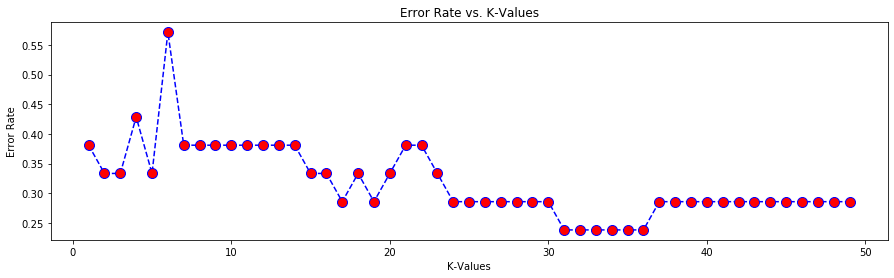

In [96]:
plt.figure(figsize=(15,4))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')